## Exploring dataset
This notebook is intended for visualisation of statistics of basic image features and comparing these statistics between the four diagnosis groups in the dataset.

In [1]:
import sys
sys.path.append("../")

In [2]:

from src.preprocessing.image_preprocessor import *
import pandas as pd


# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/COVID-19_Radiography_Dataset/'
preprocessed_data_dir = '../data/preprocessed/'


### Minimum, Maximum, Mean, Median and Standard Deviation within the pixel values of the images

In [3]:

all_image_stats=pd.DataFrame()

for i, element in enumerate(['COVID','Normal','Viral Pneumonia','Lung_Opacity']):
    image_stats = get_images_statistics(raw_data_dir+element+'/images')
    image_stats['diagnosis']=element

    all_image_stats= pd.concat([all_image_stats, image_stats], ignore_index=True)
    del image_stats


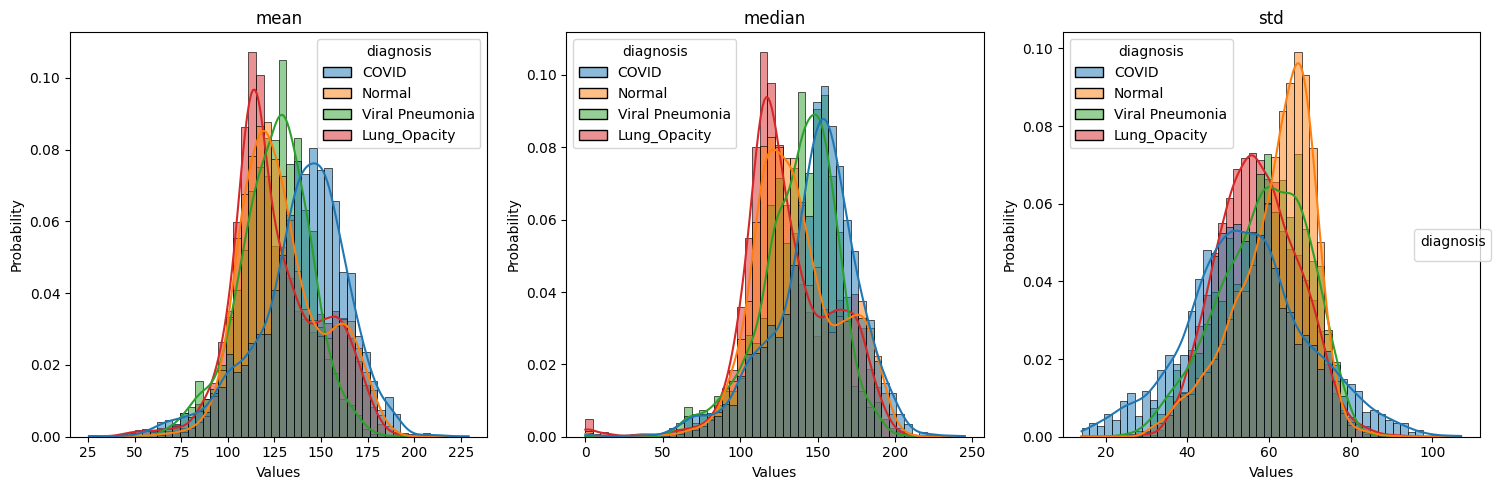

In [4]:
data= all_image_stats.drop('image', axis=1)
labels= all_image_stats.columns.drop(['image','diagnosis', 'min', 'max']).tolist()


plot_image_stats_ensembles(data, labels, 'diagnosis')

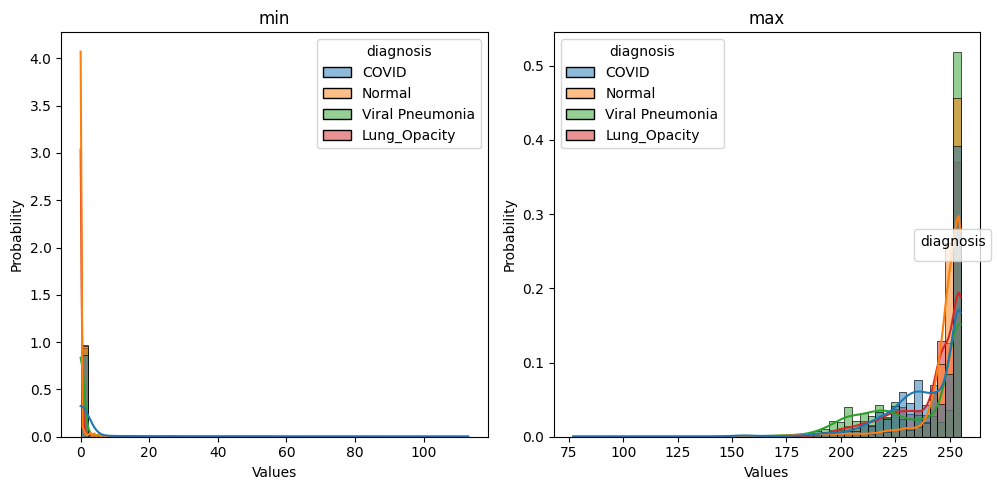

In [5]:
data= all_image_stats.drop('image', axis=1)
labels= ['min', 'max']


plot_image_stats_ensembles(data, labels, 'diagnosis')

(0.0, 7.0)

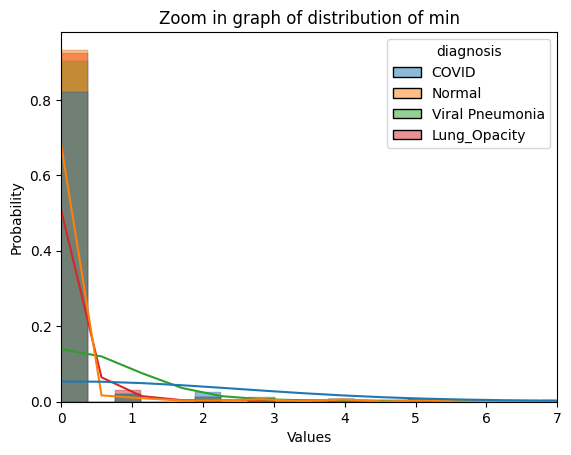

In [6]:
data= all_image_stats.drop('image', axis=1)

sns.histplot(data=data, x='min', hue='diagnosis', 
                        alpha=0.5, kde=True, stat='probability', common_norm=False, bins=300)
plt.title('Zoom in graph of distribution of min')
plt.xlabel('Values')
plt.xlim(0,7)

##### Test on at least one differing expected value in Mean, Median and Standard Deviation in pixel value in the images between the groups of diagnosis

Mean, Median and Standard Deviation seem to be more or less normally distributed so we are justified to use the F-test

In [7]:
labels=['mean','median', 'std']

print(labels)
print_significance_test_images(labels, stats_data= all_image_stats, group_var='diagnosis')


['mean', 'median', 'std']
F-statistic: 286.2, p_value: 4.007483639671148e-182
For the variable mean at least one of the groups has a significant difference in the mean.
F-statistic: 259.86, p_value: 1.2668913896065324e-165
For the variable median at least one of the groups has a significant difference in the mean.
F-statistic: 432.54, p_value: 9.346915717282258e-273
For the variable std at least one of the groups has a significant difference in the mean.


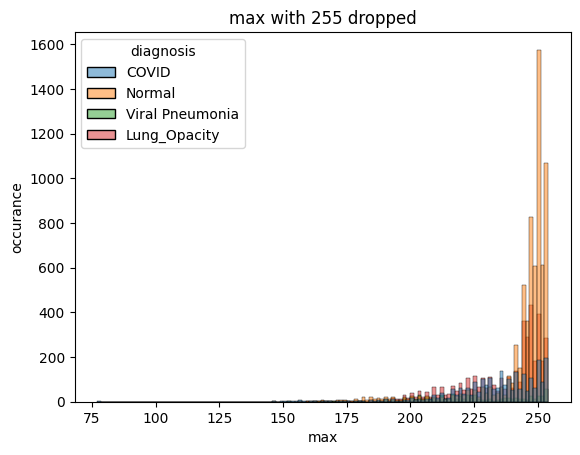

In [8]:
data=all_image_stats[['max','diagnosis']][all_image_stats['max'] !=255]
         
         
sns.histplot(data=data, x='max', hue='diagnosis',
             alpha=0.5, kde=False)
plt.xlabel('max')
plt.ylabel('occurance')
plt.title('max with 255 dropped')
plt.show()

##### Applying masks and counter-masks on the images

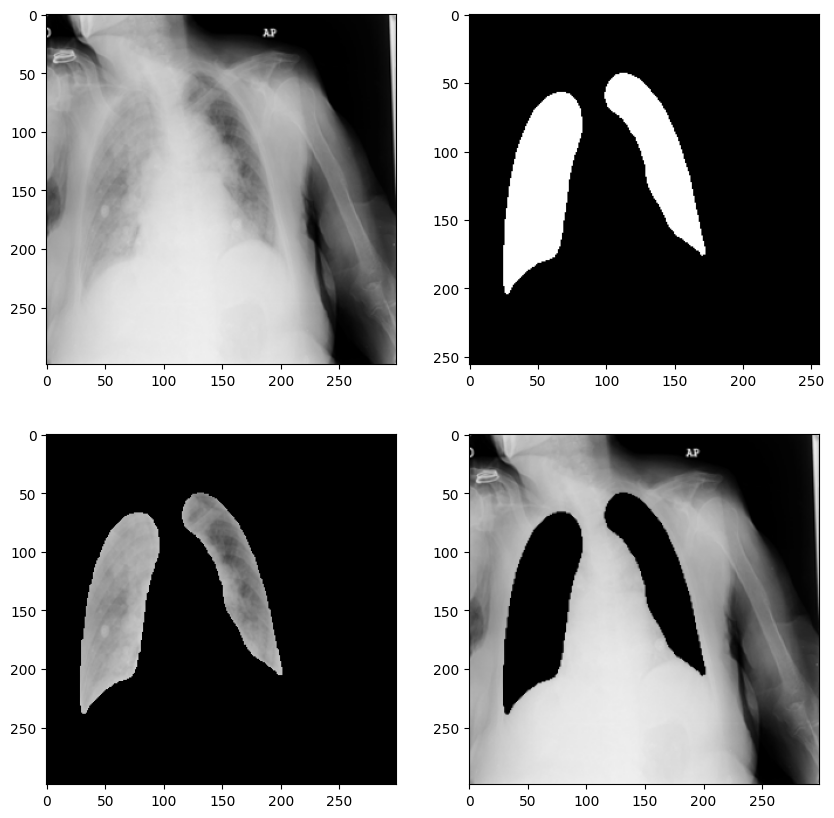

In [9]:


image_path = raw_data_dir+'/COVID/images/COVID-3411.png'
mask_path = raw_data_dir+'/COVID/masks/COVID-3411.png'



image = cv2.imread(image_path)
mask = cv2.imread(mask_path)
image_masked = apply_image_mask(image_path, mask_path)
image_counter_masked = apply_image_counter_mask(image_path, mask_path)





fig, axes = plt.subplots(2,2, figsize=(10, 10))


axes[0,0].imshow(image)
axes[0,1].imshow(mask)
axes[1,0].imshow(image_masked)
axes[1,1].imshow(image_counter_masked)
plt.show()





##### Analysis of area outside of the lungs

In [10]:

all_counter_masked_image_stats=pd.DataFrame()

for i, element in enumerate(['COVID','Normal','Viral Pneumonia','Lung_Opacity']):
    image_stats = get_counter_masked_images_statistics(raw_data_dir+element+'/images',raw_data_dir+element+'/masks')
    image_stats['diagnosis']=element

    all_counter_masked_image_stats= pd.concat([all_counter_masked_image_stats, image_stats], ignore_index=True)
    del image_stats


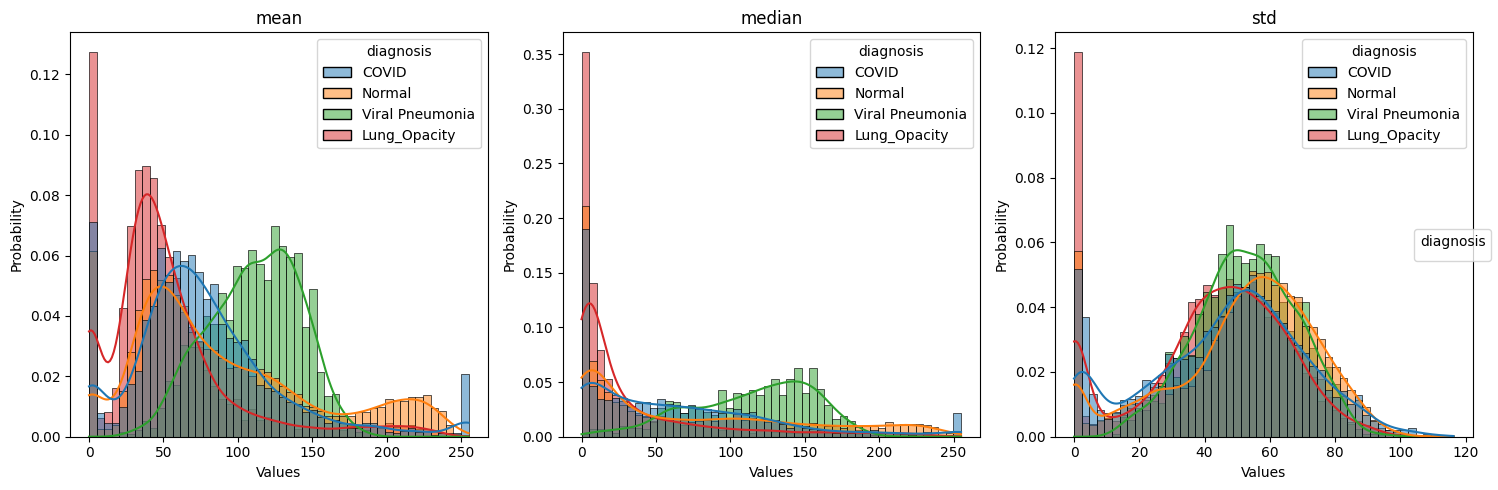

In [11]:
data= all_counter_masked_image_stats.drop('image', axis=1)
labels= ['mean','median', 'std']


plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels

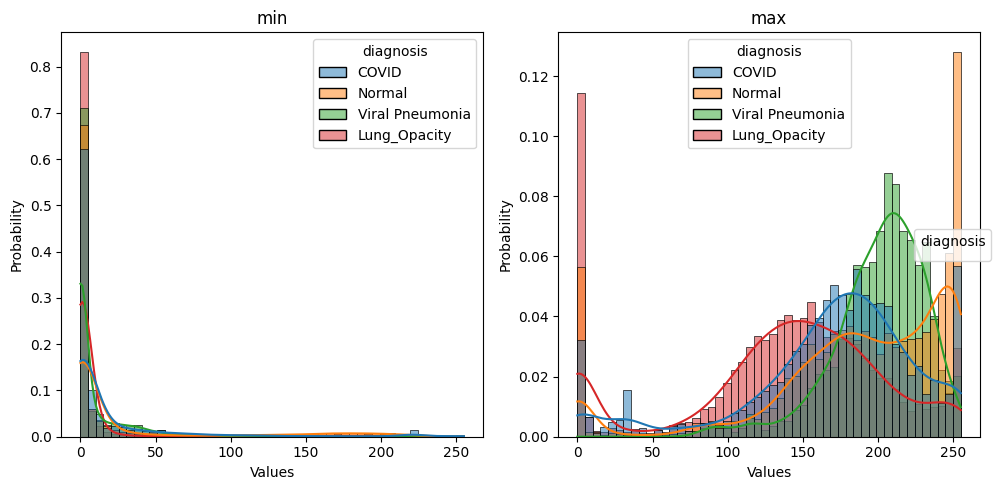

In [12]:
data= all_counter_masked_image_stats.drop('image', axis=1)
labels= ['min', 'max']


plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels

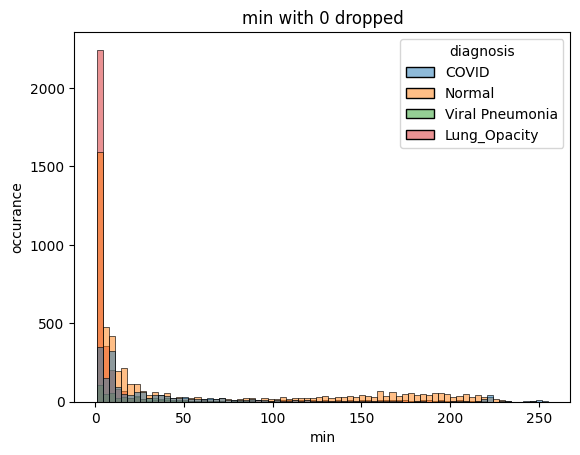

In [13]:

all_counter_masked_image_min_dropnull=all_counter_masked_image_stats[['min','diagnosis']][all_counter_masked_image_stats['min'] !=0]
         
         
sns.histplot(data=all_counter_masked_image_min_dropnull, x='min', hue='diagnosis',
             alpha=0.5, kde=False)
plt.xlabel('min')
plt.ylabel('occurance')
plt.title('min with 0 dropped')
plt.show()

##### Analysis of the area of the lungs

In [14]:
all_masked_image_stats=pd.DataFrame()

for i, element in enumerate(['COVID','Normal','Viral Pneumonia','Lung_Opacity']):
    image_stats = get_masked_images_statistics(raw_data_dir+element+'/images',raw_data_dir+element+'/masks')
    image_stats['diagnosis']=element

    all_masked_image_stats= pd.concat([all_masked_image_stats, image_stats], ignore_index=True)
    del image_stats 

    

In [15]:


all_masked_image_stats.info()
all_masked_image_stats.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   image      21165 non-null  object 
 1   min        21165 non-null  uint8  
 2   max        21165 non-null  uint8  
 3   mean       21165 non-null  float64
 4   median     21165 non-null  float64
 5   std        21165 non-null  float64
 6   diagnosis  21165 non-null  object 
dtypes: float64(3), object(2), uint8(2)
memory usage: 868.2+ KB


,image,min,max,mean,median,std,diagnosis
0,COVID-456,0,210,7.732441,0.0,37.897353,COVID
1,COVID-1403,0,0,0.000000,0.0,0.000000,COVID
2,COVID-370,0,0,0.000000,0.0,0.000000,COVID
3,COVID-980,0,0,0.000000,0.0,0.000000,COVID
4,COVID-2795,0,0,0.000000,0.0,0.000000,COVID
5,COVID-2090,0,0,0.000000,0.0,0.000000,COVID
6,COVID-1680,0,0,0.000000,0.0,0.000000,COVID
7,COVID-1744,0,0,0.000000,0.0,0.000000,COVID
8,COVID-3352,0,0,0.000000,0.0,0.000000,COVID
9,COVID-149,0,0,0.000000,0.0,0.000000,COVID


['min', 'max', 'mean', 'median', 'std']


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

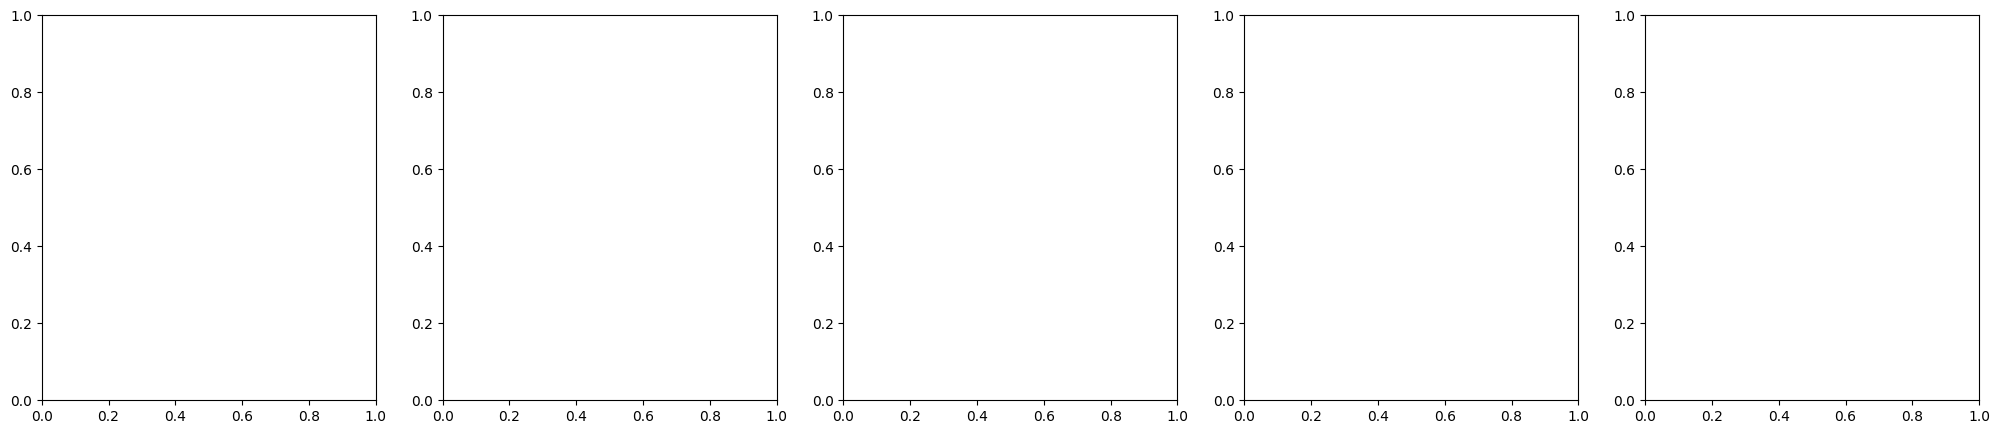

In [16]:


data= all_masked_image_stats.drop('image', axis=1)
labels= all_masked_image_stats.columns.drop(['image','diagnosis']).tolist()


print(labels)
plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels


## Blurriness, Noise, Brightness and Contrast in the images

#### Analysis of the whole image

In [ ]:

all_image_quality=pd.DataFrame()

for i, element in enumerate(['COVID','Normal','Viral Pneumonia','Lung_Opacity']):
    image_qual = get_images_quality(raw_data_dir+element+'/images')
    image_qual['diagnosis']=element

    all_image_quality= pd.concat([all_image_quality, image_qual], ignore_index=True)
    del image_qual


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       21165 non-null  object 
 1   blurriness  21165 non-null  float64
 2   noise       21165 non-null  float64
 3   brightness  21165 non-null  float64
 4   contrast    21165 non-null  uint8  
 5   diagnosis   21165 non-null  object 
dtypes: float64(3), object(2), uint8(1)
memory usage: 847.6+ KB


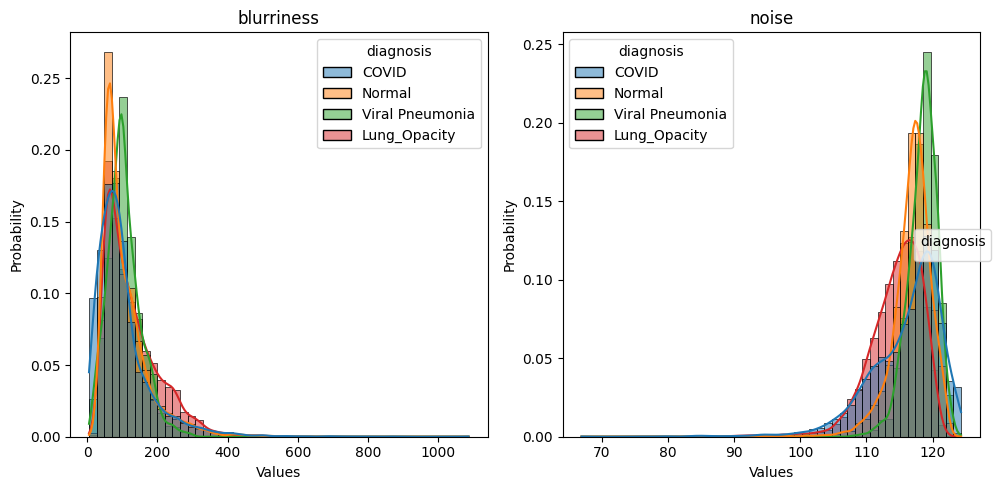

In [ ]:
all_image_quality.info()

data= all_image_quality.drop('image', axis=1)
#labels= all_image_quality.columns.drop(['image','diagnosis']).tolist()
labels=['blurriness', 'noise']

plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       21165 non-null  object 
 1   blurriness  21165 non-null  float64
 2   noise       21165 non-null  float64
 3   brightness  21165 non-null  float64
 4   contrast    21165 non-null  uint8  
 5   diagnosis   21165 non-null  object 
dtypes: float64(3), object(2), uint8(1)
memory usage: 847.6+ KB


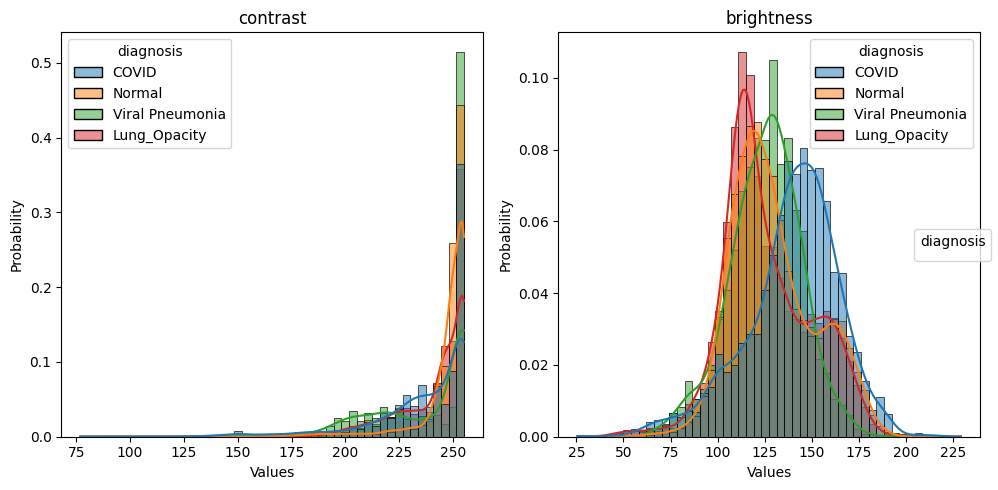

In [ ]:
all_image_quality.info()

data= all_image_quality.drop('image', axis=1)
#labels= all_image_quality.columns.drop(['image','diagnosis']).tolist()
labels=['contrast', 'brightness']

plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels


##### Test on at least one differing expected value of Blurriness, Noise, Brightness and Contrast between the groups of diagnosis


Blurriness, Noise and Brightness seem to be more or less normally distributed so we are justified to use the F-test

In [ ]:

labels= all_image_quality.columns.drop(['image','diagnosis', 'contrast']).tolist()
print(labels)


print_significance_test_images(labels, stats_data= all_image_quality, group_var='diagnosis')


['blurriness', 'noise', 'brightness']
F-statistic: 130.31, p_value: 1.1969826248553299e-83
For the variable blurriness at least one of the groups has a significant difference in the mean.
F-statistic: 624.1, p_value: 0.0
For the variable noise at least one of the groups has a significant difference in the mean.
F-statistic: 286.2, p_value: 4.007483639671148e-182
For the variable brightness at least one of the groups has a significant difference in the mean.


#### Analysis of the area outside the lungs

In [ ]:

all_counter_mask_image_quality=pd.DataFrame()

for i, element in enumerate(['COVID','Normal','Viral Pneumonia','Lung_Opacity']):
    image_qual = get_counter_mask_images_quality(raw_data_dir+element+'/images' , raw_data_dir+element+'/masks')
    image_qual['diagnosis']=element

    all_counter_mask_image_quality= pd.concat([all_counter_mask_image_quality, image_qual], ignore_index=True)
    del image_qual

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       21165 non-null  object 
 1   blurriness  21165 non-null  float64
 2   noise       21165 non-null  float64
 3   brightness  21165 non-null  float64
 4   contrast    21165 non-null  uint8  
 5   diagnosis   21165 non-null  object 
dtypes: float64(3), object(2), uint8(1)
memory usage: 847.6+ KB


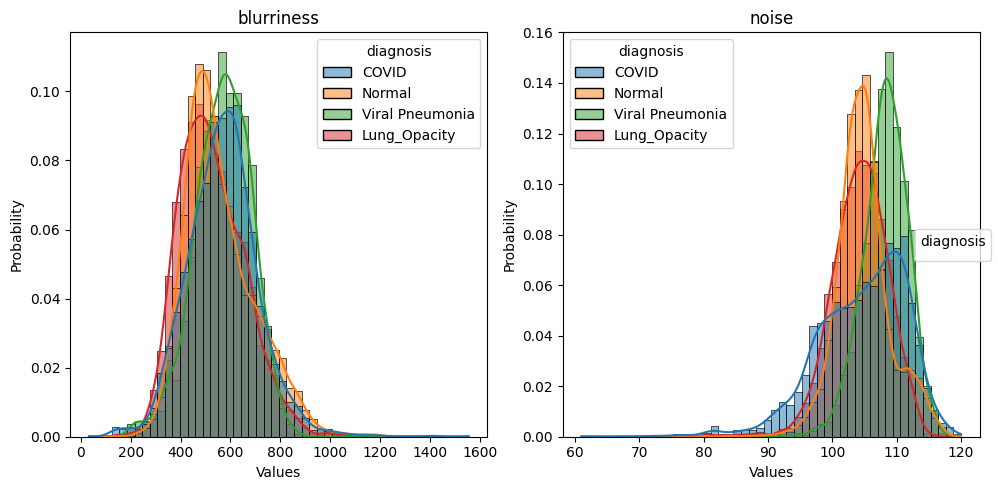

In [ ]:
all_counter_mask_image_quality.info()

data= all_counter_mask_image_quality.drop('image', axis=1)
#labels= all_counter_mask_image_quality.columns.drop(['image','diagnosis']).tolist()
labels=["blurriness", "noise"]

plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels


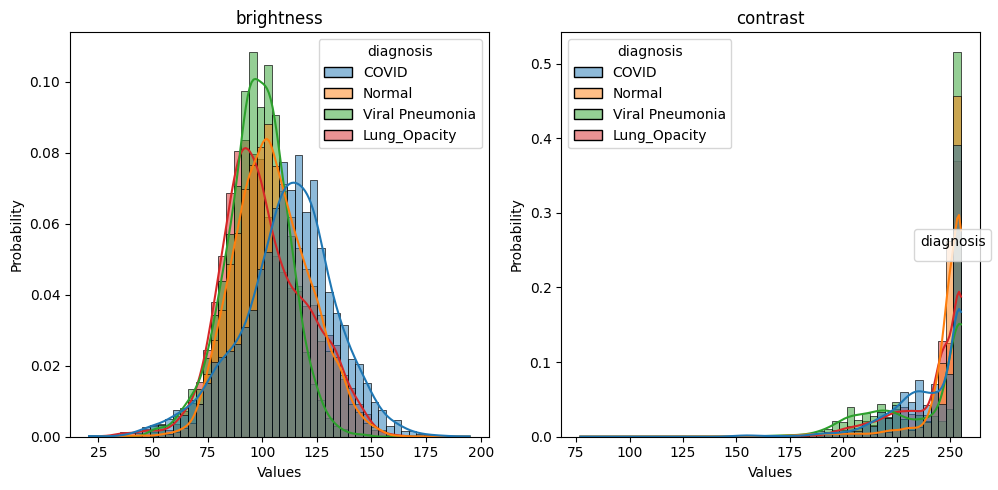

In [ ]:

data= all_counter_mask_image_quality.drop('image', axis=1)
labels=["brightness", "contrast"]

plot_image_stats_ensembles(data, labels, 'diagnosis')
del data, labels

##### Test on at least one differing expected value of Blurriness, Noise, Brightness and Contrast between the groups of diagnosis

Blurriness, Noise and Brightness seem to be more or less normally distributed so we are justified to use the F-test

In [ ]:
labels=["brightness",  "blurriness", "noise"]
print(labels)

print_significance_test_images(labels=["brightness", "blurriness", "noise"], stats_data= all_counter_mask_image_quality, group_var='diagnosis')


['brightness', 'blurriness', 'noise']
F-statistic: 295.14, p_value: 1.0325076757351492e-187
For the variable brightness at least one of the groups has a significant difference in the mean.
F-statistic: 101.66, p_value: 2.464511181822913e-65
For the variable blurriness at least one of the groups has a significant difference in the mean.
F-statistic: 255.68, p_value: 5.328765191145122e-163
For the variable noise at least one of the groups has a significant difference in the mean.


#### Analysis of the area of the lungs

In [ ]:

all_masked_image_quality=pd.DataFrame()

for i, element in enumerate(['COVID','Normal','Viral Pneumonia','Lung_Opacity']):
    image_qual = get_masked_images_quality(raw_data_dir+element+'/images' , raw_data_dir+element+'/masks')
    image_qual['diagnosis']=element

    all_masked_image_quality= pd.concat([all_masked_image_quality, image_qual], ignore_index=True)
    del image_qual



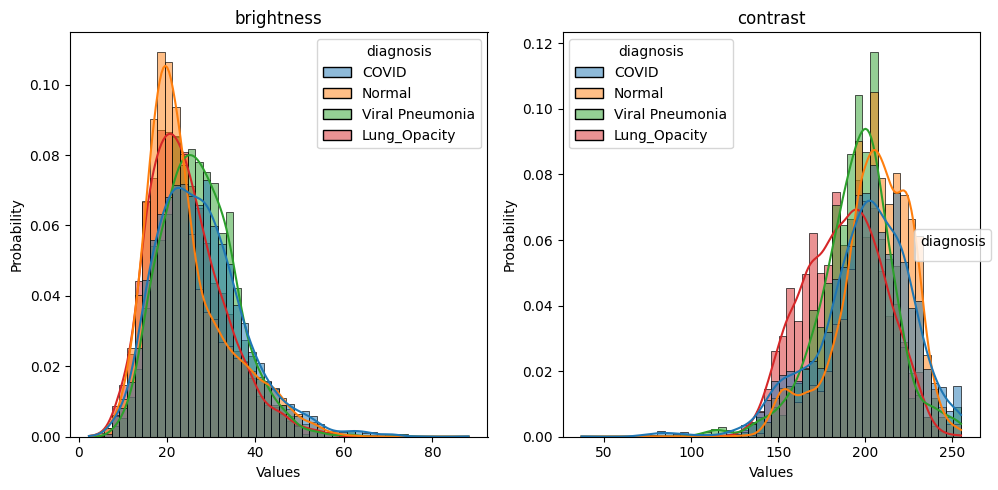

In [ ]:


plot_image_stats_ensembles(all_masked_image_quality.drop('image', axis=1), ["brightness", "contrast"], 'diagnosis')


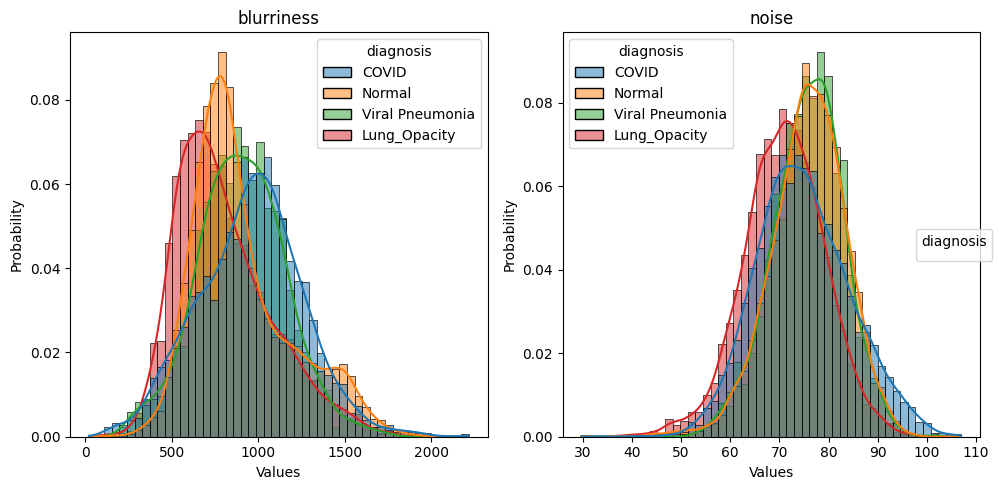

In [ ]:

plot_image_stats_ensembles(all_masked_image_quality.drop('image', axis=1), ["blurriness", "noise"], 'diagnosis')


##### Test on at least one differing expected value of Blurriness, Noise, Brightness and Contrast between the groups of diagnosis

All features seem to be near enough to being normally distributed to be justified to run an F-Test.


In [ ]:


labels= all_masked_image_quality.columns.drop(['image','diagnosis']).tolist()
print(labels)


print_significance_test_images(labels, stats_data= all_masked_image_quality, group_var='diagnosis')


['blurriness', 'noise', 'brightness', 'contrast']
F-statistic: 261.04, p_value: 2.2991577348762527e-166
For the variable blurriness at least one of the groups has a significant difference in the mean.
F-statistic: 478.26, p_value: 1.0402571066367206e-300
For the variable noise at least one of the groups has a significant difference in the mean.
F-statistic: 139.6, p_value: 1.4405816801604973e-89
For the variable brightness at least one of the groups has a significant difference in the mean.
F-statistic: 727.08, p_value: 0.0
For the variable contrast at least one of the groups has a significant difference in the mean.
